<a href="https://colab.research.google.com/github/miguealejandror/geospatialtools/blob/main/Herramientas_Espaciales_y_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Herramientas Espaciales y Python**


### **PROBLEMA 1**

Nombre del sistema de coordenadas: **EPSG:5472** 

Nombre del dato: **Panama-Colon 1911**

Elipsoide (esferoide): **Clarke 1866**

Proyección del mapa: 

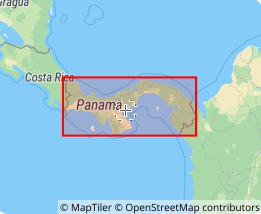

Latitud de origen: **8.25**

Meridiano Central: **-81**

Factor de Escala: **0.9143917962**

Falso Este: **1000000**

Falso Norte: **1092972.1**


URL: [Panama-Colon 1911](http://epsg.io/5472)

### **PROBLEMA 2**

1.	Cree un script en bash para llamar a shp2pgsql consecutivamente sobre cada uno de los archivos. 
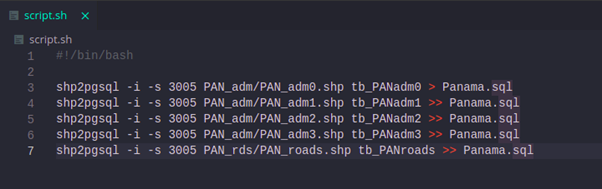

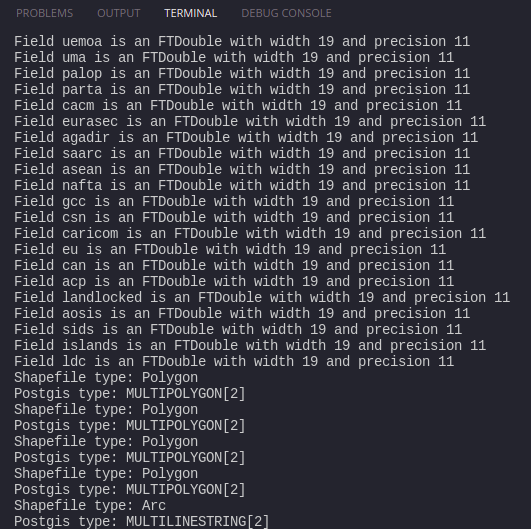

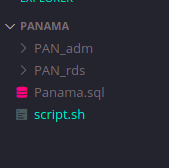


2.	Cargue el archivo llamando desde la línea de comandos o desde PgAdmin. 
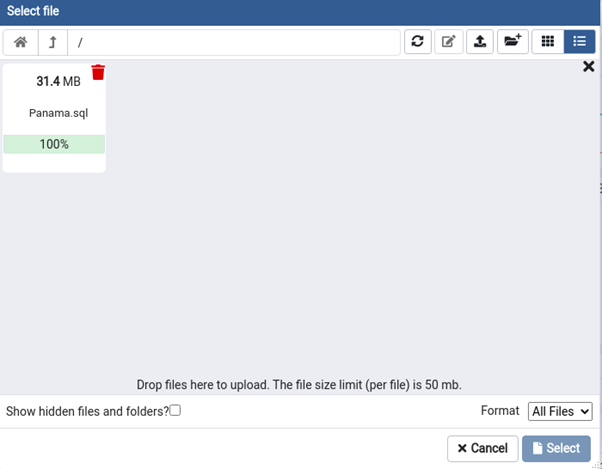

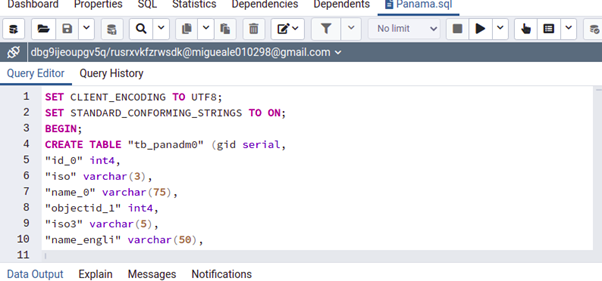

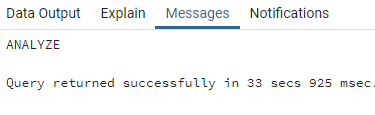

3.	Muestre que la tabla fue ingresada a la base de datos con “\d+” o con el visualizador de PgAdmin. 


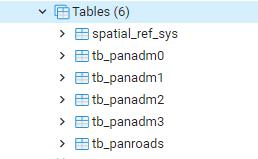

### **PROBLEMA 3**

In [ ]:
import psycopg2

In [ ]:
pip install psycopg2-binary

     |████████████████████████████████| 3.4MB 14.5MB/s 


In [ ]:
pip install pygresql

     |████████████████████████████████| 276kB 15.1MB/s 
  Created wheel for pygresql: filename=PyGreSQL-5.2.2-cp37-cp37m-linux_x86_64.whl size=162483 sha256=0ae619326e93d5feafdc2ad2d59bf2ad21100dddc8dddcccff2376db5545cefd
  Stored in directory: /root/.cache/pip/wheels/7f/93/5f/4096e2be71ad826d7df55647f61d3b9a0301ac470c2a1a7363
Successfully built pygresql


In [ ]:
conexion = psycopg2.connect(host="", database="", user="", password="")

In [ ]:
cur = conexion.cursor()

In [ ]:
# Verifique el SRID y el proj4text de la tabla PAN_pais.
cur.execute("SELECT ST_SRID(geom) as SRID FROM tb_panadm0")
query = cur.fetchall()
print(query)

[(3005,)]


In [ ]:
# ¿Cuantos tipos de caminos existen en la tabla Pan_roads? ¿Cuántos hay para cada tipo? (agrupe con Groupby)
cur.execute("SELECT rtt_descri, count(rtt_descri) FROM tb_panroads GROUP BY rtt_descri")
query = cur.fetchall()
print(query)

[('Unknown', 13), ('Primary Route', 124), ('Secondary Route', 229)]


In [ ]:
# Liste la información de aquellos distritos, de la tabla Pan_adm3, que estén en comarca indígena o los que están en o cerca de un cuerpo de agua.
cur.execute("SELECT name_2, name_3 FROM tb_panadm3 WHERE engtype_3 = 'Water body' OR  engtype_3 = 'Indigenous Territory'")
query = cur.fetchall()
print(query)


[('Lago Gatún', 'Waterbody'), ('Pinogana', 'Kuna de Wargandí'), ('Lago Gatún', 'Waterbody'), ('Chepo', 'Kuna de Madungandí'), ('Lago Alajuela', 'Waterbody'), ('Lago Bayano', 'Waterbody')]


In [ ]:
# Calcule el área en km2 totales, usando ST_Area, para todas las provincias, ordene sus resultados de manera descendente. 
cur.execute("SELECT name_1, ST_Area(geom)/1000000 as Area FROM tb_panadm1 ORDER BY Area desc")
query = cur.fetchall()
print(query)


[('Darién', 9.870815806989512e-07), ('Veraguas', 8.94939037532821e-07), ('Panamá', 7.227278374339342e-07), ('Chiriquí', 5.439321915855633e-07), ('Ngöbe Buglé', 5.426627980741582e-07), ('Coclé', 4.0309461117430666e-07), ('Colón', 3.8510136079640667e-07), ('Bocas del Toro', 3.846550632552e-07), ('Emberá', 3.4560963061812146e-07), ('Los Santos', 3.1100386627440015e-07), ('Panamá Oeste', 2.5035674834724855e-07), ('Kuna Yala', 2.0607050719991836e-07), ('Herrera', 1.9071915305721493e-07)]


In [ ]:
# Provea la suma total en km de todos los segmentos de carretera que están en la tabla Pan_roads.
cur.execute("SELECT SUM(ST_Length(geom)/1000) FROM tb_panroads")
query = cur.fetchall()
print(query)

[(0.040745387586695214,)]


In [ ]:
# Liste 5 distritos que contienen aros (rings) concéntricos dentro de su área.
cur.execute("SELECT name_2, ST_Centroid(geom) FROM tb_panadm2 LIMIT 5")
query = cur.fetchall()
print(query)

[('Bocas del Toro', '0101000020BD0B000048F305B4039054C0CCF3BBE3A86E2240'), ('Changuinola', '0101000020BD0B0000D46F97FAF8A854C07F8DC3AA89752240'), ('Chiriquí Grande', '0101000020BD0B0000536B12AF3B8C54C0370A3D3418F22140'), ('Alanje', '0101000020BD0B00004674855BAAA754C0B6CE994C00C12040'), ('Barú', '0101000020BD0B00007DA785E878B854C006F9DBD01EA42040')]


### **PROBLEMA 4**

In [ ]:
pip install geopandas

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
df = gpd.GeoDataFrame.from_postgis('SELECT *, ST_AREA(geom)/1000000 as Area from tb_panadm1',conexion,geom_col='geom')

In [ ]:
df.head(8)

,gid,id_0,iso,name_0,id_1,name_1,type_1,engtype_1,nl_name_1,varname_1,geom,area
0,1,174,PAN,Panama,1,Bocas del Toro,Provincia,Province,None,None,"MULTIPOLYGON (((-82.08041 8.93542, -82.08041 8...",3.846551e-07
1,2,174,PAN,Panama,2,Chiriquí,Provincia,Province,None,None,"MULTIPOLYGON (((-82.43430 7.86986, -82.43430 7...",5.439322e-07
2,3,174,PAN,Panama,3,Coclé,Provincia,Province,None,None,"MULTIPOLYGON (((-80.10986 8.35514, -80.10986 8...",4.030946e-07
3,4,174,PAN,Panama,4,Colón,Provincia,Province,None,None,"MULTIPOLYGON (((-79.60875 9.22542, -79.60875 9...",3.851014e-07
4,5,174,PAN,Panama,5,Darién,Provincia,Province,None,None,"MULTIPOLYGON (((-78.04708 7.40708, -78.04708 7...",9.870816e-07
5,6,174,PAN,Panama,6,Emberá,Comarca Indígena,Indigenous Territory,None,Emberá-Wounaan,"MULTIPOLYGON (((-78.16492 8.08068, -78.16338 8...",3.456096e-07
6,7,174,PAN,Panama,7,Herrera,Provincia,Province,None,None,"MULTIPOLYGON (((-80.58106 8.12669, -80.58262 8...",1.907192e-07
7,8,174,PAN,Panama,8,Kuna Yala,Comarca Indígena,Indigenous Territory,None,None,"MULTIPOLYGON (((-77.56847 8.79042, -77.56847 8...",2.060705e-07


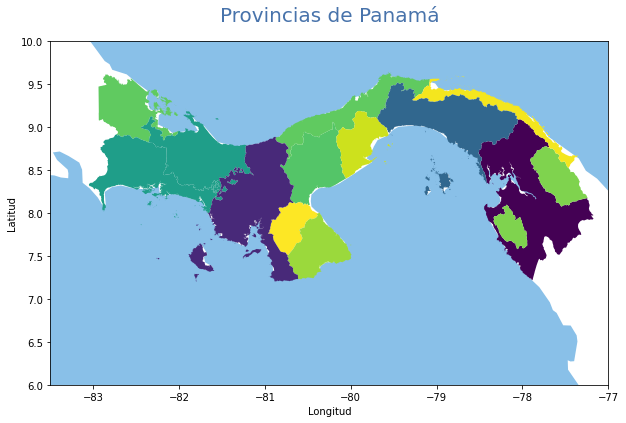

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Control del encuadre (área geográfica) del mapa
ax.axis([-83.5, -77, 6, 10])
 
# Control del título y los ejes
ax.set_title('Provincias de Panamá', pad = 20, fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
# Mostrar el mapa finalizado
df.plot(column='area', cmap='viridis_r', ax=ax, zorder=5)
# Cargar un mapa base con contornos de países
oceanos = "/content/ne_50m_ocean.shp"
map_oceanos = gpd.read_file(oceanos)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

### **PROBLEMA 5**

In [ ]:
# Ubicar 2 datasets de su interés, bájelos y léalos usando Geopandas. 
df_PP= gpd.read_file("/content/California_Power_Plants.geojson")
df_ES= gpd.read_file("/content/Electric_Substations_(CEC).geojson")

In [ ]:
# Describa las columnas de los dataset
df_PP.describe()

,OBJECTID_12,CIscoreP,RPS_Eligible,SmallPlant,Peaker,Small_Hydro,SolarThermal,Pumped_Storage,Pumping_Generating,SelfGeneration,SelfGenerationNAICSID,CoGeneration,CoGenerationNAICSID,NoReport,Retired_Plant,CEC_Jurisdictional,Zip,Capacity_Latest,LastReportedYear
count,1851.000000,1699.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1850.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1700.000000,1786.000000,1786.000000
mean,926.000000,54.651520,0.730956,0.535927,0.050243,0.116694,0.008104,0.002161,0.003241,0.203674,41710.575676,0.126418,48782.309562,0.130200,0.113992,0.042680,93383.529412,61.360168,2018.930571
std,534.481992,25.758399,0.443583,0.498842,0.218505,0.321142,0.089679,0.046449,0.056857,0.402838,136991.432835,0.332410,147404.639714,0.336614,0.317888,0.202188,3758.963564,222.927212,3.423873
min,1.000000,1.513432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000,2001.000000
25%,463.500000,33.118931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92269.250000,1.500000,2020.000000
50%,926.000000,56.413167,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93513.500000,7.330000,2020.000000
75%,1388.500000,77.248077,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95076.000000,40.000000,2020.000000
max,1851.000000,99.987388,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,928100.000000,1.000000,928100.000000,1.000000,1.000000,1.000000,96148.000000,5650.200000,2020.000000


In [ ]:
df_ES.describe()


,OBJECTID,Max_Voltage,Lon,Lat
count,4442.000000,3375.00000,4442.000000,4442.000000
mean,2221.500000,95.42637,-119.751451,36.391133
std,1282.439277,64.95778,2.098482,2.373577
min,1.000000,33.00000,-124.210133,32.562170
25%,1111.250000,60.00000,-121.477325,34.051748
50%,2221.500000,66.00000,-119.969783,36.531256
75%,3331.750000,115.00000,-118.047317,38.320969
max,4442.000000,500.00000,-114.141425,42.079864


In [ ]:
# Visualice los geodataframes
df_PP.head(3)

,OBJECTID_12,Plant_ID,CIscoreP,Fire_Threat_0321,CECPlantID,PlantName,EIAPlantID,ResourceID,RPS_Eligible,SmallPlant,Peaker,Small_Hydro,SolarThermal,Pumped_Storage,Pumping_Generating,SelfGeneration,SelfGenerationNAICSID,CoGeneration,CoGenerationNAICSID,NoReport,Retired_Plant,CEC_Jurisdictional,OwnerID,UtilityID,OperatorCompanyID,PreparerCompanyID,Street,City,County,State,Zip,Capacity_Latest,Units,PriEnergySource,LastReportedYear,geometry
0,1,B0001,61.256148,None,B0001,Vaca Dixon Battery Storage,59256,VACADX_1_NAS,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pacific Gas & Electric (PG&E),Pacific Gas & Electric (PG&E),Pacific Gas & Electric (PG&E),Pacific Gas & Electric (PG&E),5138 Midway Road,Vacaville,Solano,CA,95688.0,2.4,Unit 1,BAT,2013.0,POINT (-121.92163 38.40010)
1,2,B0002,57.800479,Tier 2 (Elevated),B0002,Tehachapi Storage Project,59661,MONLTH_6_BATTRY,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Available,Southern California Edison (SCE),Not Available,Not Available,14556 E Tehachapi Blvd,Tehachapi,Kern,CA,93561.0,NaN,None,None,NaN,POINT (-118.38000 35.12333)
2,3,B0003,19.598941,None,B0003,Yerba Buena Battery,59257,SWIFT_1_NAS,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Available,Pacific Gas & Electric (PG&E),Not Available,Not Available,Yerba Buena Road,San Jose,Santa Clara,CA,95121.0,NaN,None,None,NaN,POINT (-121.75011 37.30723)


In [ ]:
df_ES.head(3)

,OBJECTID,CEC_Sub_ID,Status,Owner,Path,Source,Type,HIFLD_ID,Name,Max_Voltage,ZIP_CODE,STATE,COUNTY,CITY,Lon,Lat,geometry
0,1,SS0003,Operational,Other,None,CEC,SUBSTATION,310025,Jenney,115.0,94501,CA,Alameda County,Alameda,-122.242916,37.772436,POINT (-122.24292 37.77244)
1,2,SS0004,Operational,PG&E,None,CEC,SUBSTATION,306474,Corona,115.0,94954,CA,Sonoma County,Petaluma,-122.657369,38.265013,POINT (-122.65737 38.26501)
2,3,SS0005,Operational,PG&E,None,CEC,SUBSTATION,310124,South Bay 1,NaN,94514,CA,Alameda County,Unincorporated,-121.625951,37.778482,POINT (-121.62595 37.77848)


In [ ]:
# Haga algunas búsquedas (filtrando usando indexación booleana) basado en la información de las columnas de los archivos
df_PP["Capacity_Latest"]>0

0        True
1       False
2       False
3       False
4       False
        ...  
1846     True
1847     True
1848     True
1849     True
1850     True
Name: Capacity_Latest, Length: 1851, dtype: bool

In [ ]:
df_ES["Max_Voltage"]>100

0        True
1        True
2       False
3       False
4        True
        ...  
4437    False
4438     True
4439     True
4440    False
4441    False
Name: Max_Voltage, Length: 4442, dtype: bool

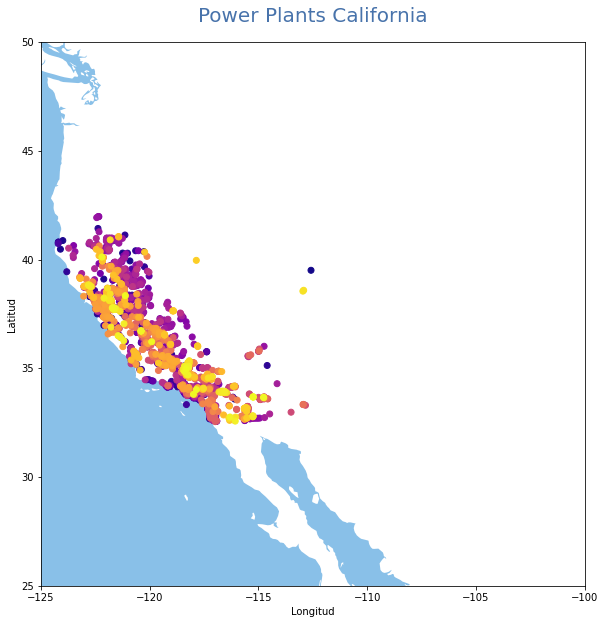

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Control del encuadre (área geográfica) del mapa
ax.axis([-125, -100, 25, 50])
 
# Control del título y los ejes
ax.set_title('Power Plants California', pad = 20, fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
# Mostrar el mapa finalizado
df_PP.plot(cmap='plasma', ax=ax, zorder=5)
# Cargar un mapa base con contornos de países
oceanos = "/content/ne_50m_ocean.shp"
map_oceanos = gpd.read_file(oceanos)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

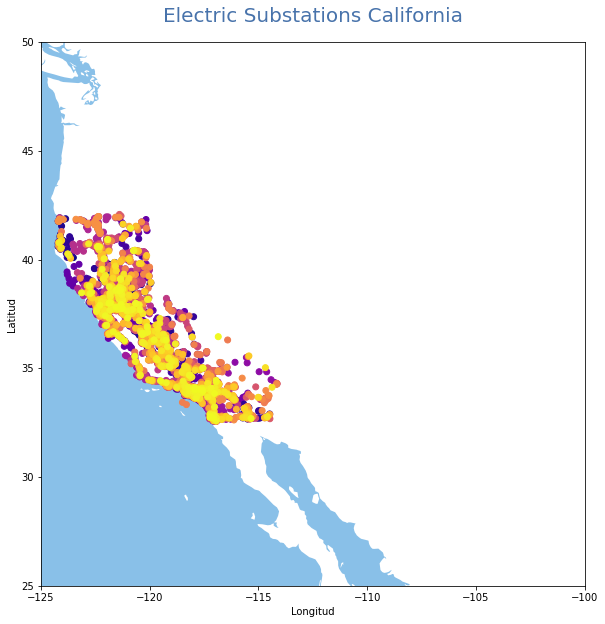

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Control del encuadre (área geográfica) del mapa
ax.axis([-125, -100, 25, 50])
 
# Control del título y los ejes
ax.set_title('Electric Substations California', pad = 20, fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
# Mostrar el mapa finalizado
df_ES.plot(cmap='plasma', ax=ax, zorder=5)
# Cargar un mapa base con contornos de países
oceanos = "/content/ne_50m_ocean.shp"
map_oceanos = gpd.read_file(oceanos)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)